# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** ALDI PUTRA MIFTAQULL ULLUM
- **Email:** aldiullum@gmail.com
- **ID Dicoding:** aldiputra24

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola peminjaman sepeda antara hari-hari dengan cuaca cerah dan hari-hari dengan hujan?
- Pada jam berapa terjadi lonjakan peminjaman sepeda tertinggi dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data/Bike/Data/day.csv")
hour_df = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data/Bike/Data/hour.csv")

In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Day DataFrame

- Cek Tipe Data

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil diatas, pada kolom dteday terdapat kesalahan tipe yang seharusnya ber tipe data datetime

- Cek Missing Values

In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Cek Duplikat Data

In [9]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


- Statistik Deskriptif

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Hour DataFrame

- Cek Tipe Data

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari hasil diatas, hour_df memiliki kesalahan tipe data pada kolom dteday yang seharusnya ber tipe data datetime

- Cek Missing Values

In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Cek Duplikat Data

In [13]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


- Statistik Deskriptif

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Day DataFrame

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data day_df pada kolom dteday telah berhasil diubah menjadi datetime.

#### Hour DataFrame

In [17]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data hour_df pada kolom dteday telah berhasil diubah menjadi datetime.

## Exploratory Data Analysis (EDA)

In [19]:
day_df.describe(include="all")

<ipython-input-19-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


<ipython-input-20-b615822e7112>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = day_df.corr()


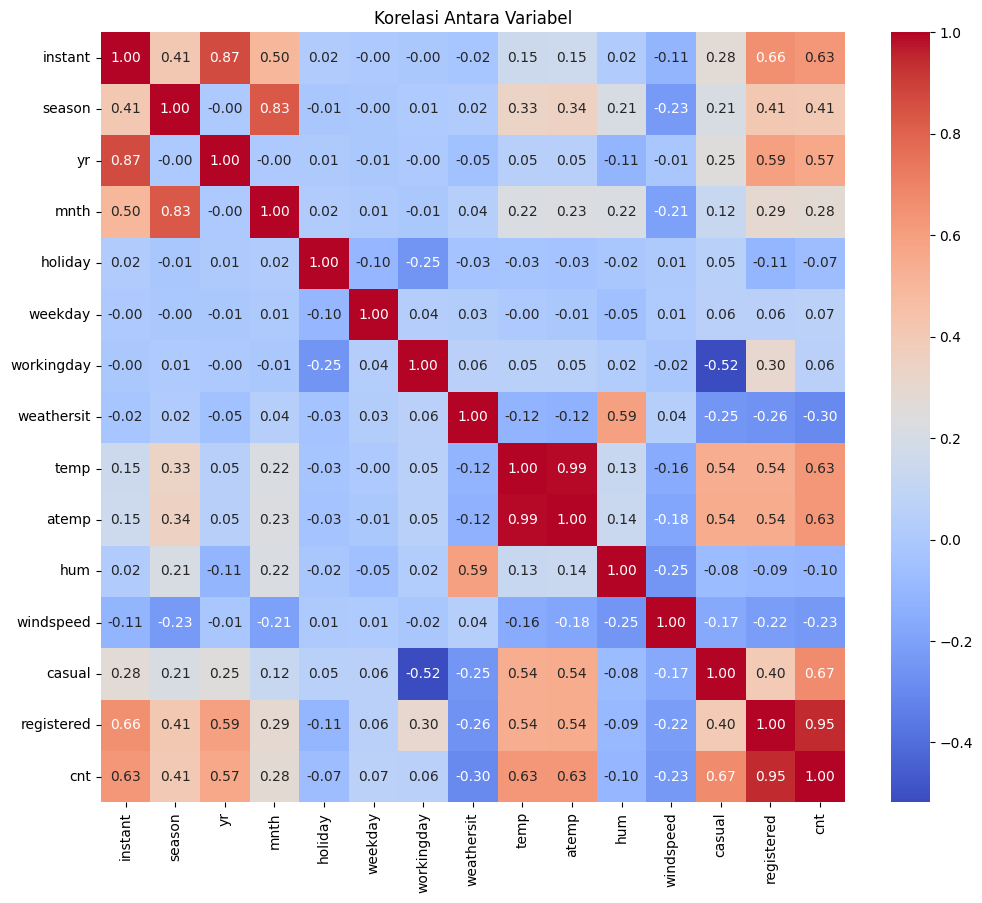

In [20]:
correlation_matrix = day_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antara Variabel')
plt.show()

Terdapat korelasi positif yang cukup kuat antara variabel "registered" dan "cnt". Hal ini bermakna bahwa semakin registered, semakin tinggi pula cnt.

In [21]:
day_df.groupby(by="season").agg(lambda x: x.mode().iloc[0])

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,
1,1,2011-01-01,1,1,0,0,1,1,0.265833,0.243058,0.395833,0.161079,120,1454,1162
2,80,2011-03-21,0,5,0,1,1,1,0.437500,0.450121,0.456250,0.102000,653,1506,4401
3,172,2011-06-21,0,7,0,4,1,1,0.599167,0.654688,0.590417,0.129354,729,3107,1115
4,266,2011-09-23,0,10,0,0,1,1,0.484167,0.607975,0.524583,0.106350,178,4934,2424


Pada hasil diatas menampilkan 4 season, berikut untuk masing-masing musim:

- 1:spring
- 2:summer
- 3:fall
- 4:winter

In [22]:
seasonal_cnt_total = day_df.groupby('season')['cnt'].sum()
print(seasonal_cnt_total)

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


  Musim 1 (Spring): Pada musim semi, tercatat total 471.348 peminjaman sepeda. Ini mungkin mencerminkan peningkatan aktivitas di luar ruangan ketika cuaca mulai membaik setelah musim dingin.

  Musim 2 (Summer): Selama musim panas, jumlah peminjaman sepeda meningkat menjadi 918.589. Musim panas sering kali menjadi waktu yang populer bagi orang untuk melakukan kegiatan luar ruangan, termasuk bersepeda.

  Musim 3 (Fall): Musim gugur menunjukkan total tertinggi dengan 1.061.129 peminjaman sepeda. Musim ini mungkin menjadi waktu yang nyaman bagi banyak orang untuk bersepeda karena suhu yang lebih sejuk namun masih cukup hangat.

  Musim 4 (Winter): Total peminjaman sepeda turun selama musim dingin menjadi 841.613. Kondisi cuaca yang lebih dingin dan kadang-kadang ekstrem selama musim dingin mungkin mengurangi minat orang untuk bersepeda di luar ruangan.

### Explore DataFrame day_df

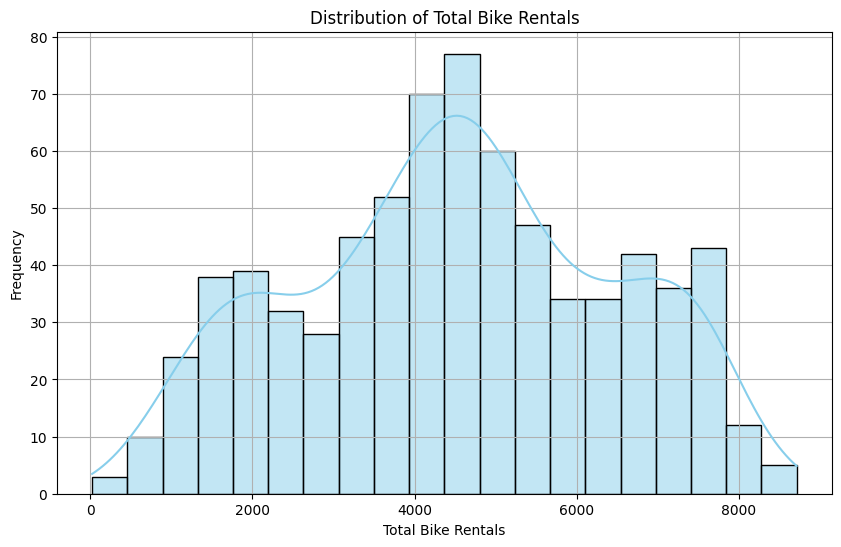

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.title('Distribution of Total Bike Rentals')
plt.grid(True)
plt.show()

Histogram tersebut menampilkan distribusi frekuensi dari jumlah peminjaman sepeda pada rentang tertentu. Dengan menggunakan 20 bins, histogram ini memberikan gambaran visual tentang sebaran jumlah peminjaman sepeda, di mana tinggi setiap batang menunjukkan frekuensi kemunculan nilai tersebut

In [24]:
day_df.groupby(by="weathersit").agg({
    "cnt": "sum"
})

,cnt
weathersit,
1,2257952
2,996858
3,37869


Weathersit 1: Terdapat total 2.257.952 peminjaman sepeda saat kondisi cuaca cerah atau sedikit berawan. Ini menunjukkan bahwa kebanyakan orang lebih memilih untuk bersepeda saat cuaca cerah, karena kondisi cuaca yang baik mendorong keinginan untuk melakukan aktivitas di luar ruangan.

Weathersit 2: Pada kondisi cuaca ini, tercatat sebanyak 996.858 peminjaman sepeda. Weathersit 2 mungkin mencakup kondisi cuaca yang sedikit buram atau berkabut, yang masih memungkinkan untuk bersepeda meskipun tidak sebaik saat cuaca cerah. Namun, jumlah peminjaman pada kondisi ini secara signifikan lebih rendah dibandingkan dengan cuaca cerah.

Weathersit 3: Hanya ada 37.869 peminjaman sepeda yang terjadi saat cuaca terjadi hujan ringan atau salju ringan dengan awan tersebar. Kondisi cuaca yang tidak ideal seperti hujan atau salju mungkin membuat orang enggan untuk bersepeda, yang tercermin dari jumlah peminjaman yang rendah pada kondisi cuaca ini.

Penjelasan ini juga mencatat bahwa kondisi cuaca ke-4 tidak ditampilkan karena tidak ada sepeda yang dipinjam saat cuaca tersebut. Hal ini menunjukkan bahwa cuaca yang sangat buruk, seperti hujan deras atau salju tebal, dapat menghambat minat orang untuk bersepeda secara signifikan.

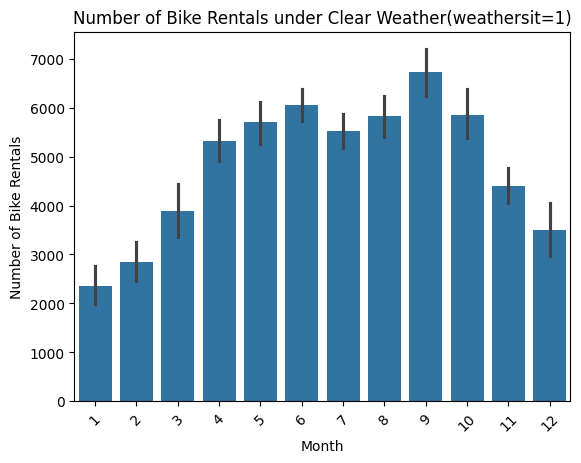

In [25]:
weather_1_data = day_df[day_df['weathersit'] == 1]

sns.barplot(data=weather_1_data, x="mnth", y="cnt")

plt.xlabel('Month')
plt.ylabel('Number of Bike Rentals')
plt.title('Number of Bike Rentals under Clear Weather(weathersit=1)')

plt.xticks(rotation=45)
plt.show()

Hasil visualisasi di atas menggambarkan pola atau tren jumlah peminjaman sepeda di setiap bulan dalam kondisi cuaca cerah (weathersit=1). Dari plot tersebut, saya memperoleh wawasan bahwa ada bulan-bulan tertentu yang memiliki tingkat peminjaman sepeda yang lebih tinggi atau lebih rendah saat cuaca cerah. Pada bulan September (9) terlihat tertinggi dan terendah bulan januari (1)

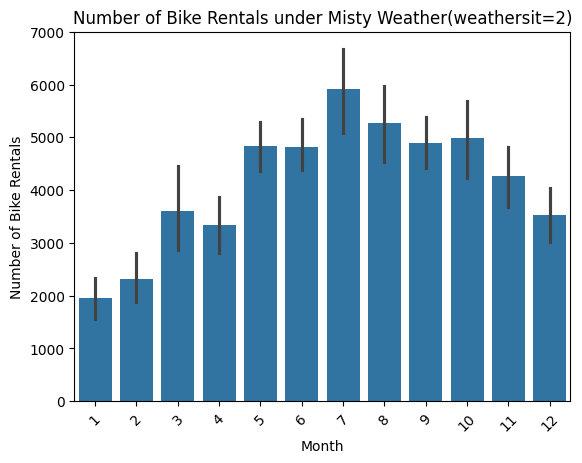

In [26]:
weather_2_data = day_df[day_df['weathersit'] == 2]

sns.barplot(data=weather_2_data, x="mnth", y="cnt")

plt.xlabel('Month')
plt.ylabel('Number of Bike Rentals')
plt.title('Number of Bike Rentals under Misty Weather(weathersit=2)')

plt.xticks(rotation=45)
plt.show()

Hasil visualisasi di atas memperlihatkan pola atau tren jumlah peminjaman sepeda di setiap bulan dalam kondisi cuaca berkabut (weathersit=2). Dari plot tersebut, saya mendapat wawasan bahwa terdapat bulan-bulan tertentu yang memiliki tingkat peminjaman sepeda yang lebih tinggi atau lebih rendah saat cuaca berkabut. Pada bulan Juli (7), terlihat jumlah peminjaman sepeda tertinggi, sedangkan pada bulan Januari (1) jumlah peminjaman sepeda terendah.

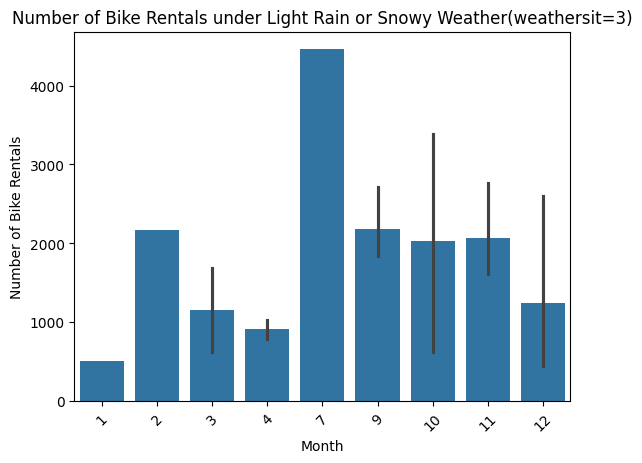

In [27]:
weather_3_data = day_df[day_df['weathersit'] == 3]

sns.barplot(data=weather_3_data, x="mnth", y="cnt")

plt.xlabel('Month')
plt.ylabel('Number of Bike Rentals')
plt.title('Number of Bike Rentals under Light Rain or Snowy Weather(weathersit=3)')

plt.xticks(rotation=45)
plt.show()

 Pada cuaca ketiga, terjadi penurunan secara signifikan dalam jumlah peminjaman sepeda dibandingkan dengan cuaca satu dan dua. Hal ini menunjukkan bahwa kondisi cuaca salju ringan atau hujan ringan dengan awan tersebar dapat memiliki dampak yang lebih besar terhadap jumlah peminjaman sepeda.

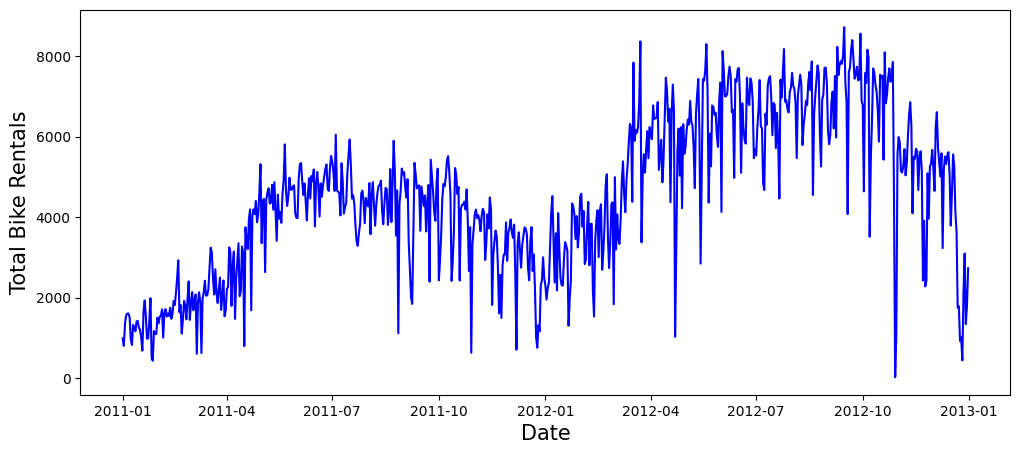

In [28]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

plt.figure(figsize=(12, 5))
plt.plot(day_df['dteday'], day_df['cnt'], color='blue')
plt.xlabel('Date',size=15)
plt.ylabel('Total Bike Rentals',size=15)
plt.show()

Grafik diatas menunjukkan jumlah total penyewaan dari tahun 2011 hingga 2013.

Sumbu:

- Sumbu Y: Jumlah total penyewaan sepeda (cnt)
- Sumbu X: Tanggal (dteday)

Tren:

Terjadi peningkatan dalam jumlah total penyewaan sepeda dari tahun 2011-01 hingga 2012-04.
Dari tahun 2012-04 hingga 2012-10, terdapat fluktuasi dalam jumlah total penyewaan sepeda, dengan beberapa periode peningkatan dan penurunan.
Secara keseluruhan, terdapat tren kenaikan dalam jumlah total penyewaan sepeda selama periode 2011-2013.
Poin Penting:

Pada tahun 2011-01, total penyewaan sepeda di bawah 2.000.
Pada tahun 2012-04, total penyewaan sepeda mencapai puncaknya di atas 8.000.
Pada tahun 2012-10, total penyewaan sepeda mulai turun mencapai sekitar 6.000.

### Explore DataFrame hour_df

In [29]:
rentals_by_year = hour_df.groupby('yr')['registered'].sum()

# Menampilkan jumlah peminjaman sepeda untuk setiap tahun
print("Total peminjaman sepeda pada tahun 2011:", rentals_by_year[0])
print("Total peminjaman sepeda pada tahun 2012:", rentals_by_year[1])

Total peminjaman sepeda pada tahun 2011: 995851
Total peminjaman sepeda pada tahun 2012: 1676811


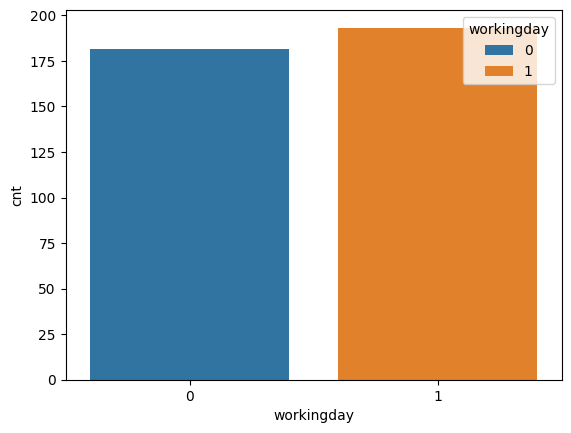

In [30]:
sns.barplot(data=hour_df, x="workingday", y="cnt", hue="workingday", errorbar=None)
plt.show()

Plot bar ini membandingkan jumlah rata-rata peminjaman sepeda (cnt) antara hari kerja dan hari libur. Plot bar tersebut menunjukkan bahwa rata-rata peminjaman sepeda pada hari kerja sedikit lebih tinggi daripada pada hari libur

## Visualization & Explanatory Analysis

### 1. Bagaimana perbedaan pola peminjaman sepeda antara hari-hari dengan cuaca cerah dan hari-hari dengan hujan?

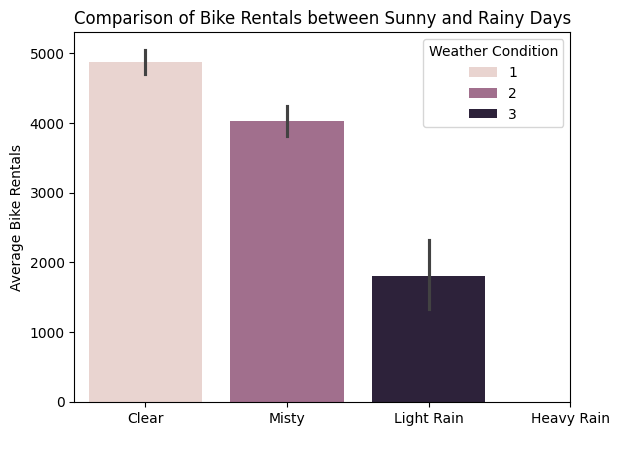

In [37]:
sns.barplot(data=day_df, x="weathersit", y="cnt", hue="weathersit")

plt.xlabel(' ')
plt.ylabel('Average Bike Rentals')
plt.title('Comparison of Bike Rentals between Sunny and Rainy Days')

plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Misty', 'Light Rain', 'Heavy Rain'])

plt.legend(title='Weather Condition')
plt.show()

weathersit :

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Insight:

Dari hasil analisis grafik, dapat disimpulkan bahwa kondisi cuaca berperan besar dalam jumlah sepeda yang disewa. Grafik tersebut menunjukkan bahwa cuaca memiliki pengaruh yang signifikan terhadap perilaku pengguna sepeda. Secara khusus, kita melihat bahwa pada kondisi cuaca tertentu, seperti cuaca yang cerah (weathersit 1), jumlah sepeda yang disewa cenderung meningkat secara mencolok.

Namun, perlu dicatat bahwa kondisi cuaca 4 tidak menampilkan batang karena tidak ada peminjaman di bawah kondisi cuaca tersebut.

### 2. Pada jam berapa terjadi lonjakan peminjaman sepeda tertinggi dalam sehari?

In [32]:
rentals_by_hour = hour_df.groupby('hr')['cnt'].sum()

jam_tertinggi = rentals_by_hour.idxmax()
jam_tertinggi_formatted = str(jam_tertinggi) + ':00'
jumlah_tertinggi = rentals_by_hour.max()

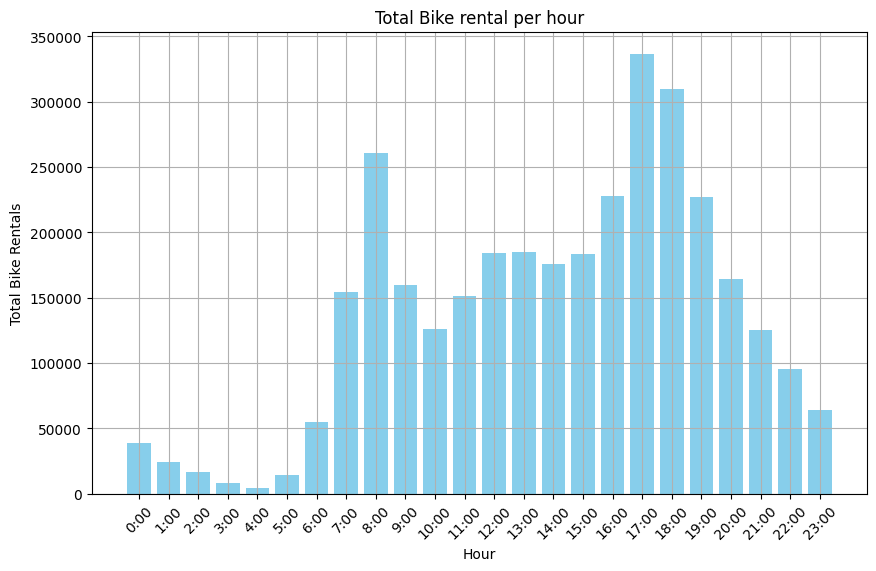

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(rentals_by_hour.index, rentals_by_hour.values, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike rental per hour')
plt.xticks(range(24), [str(hour) + ':00' for hour in range(24)], rotation=45)
plt.grid(True)
plt.show()

In [34]:
print("Jam dengan jumlah peminjaman sepeda tertinggi:", jam_tertinggi_formatted)
print("Jumlah peminjaman sepeda pada jam tersebut:", jumlah_tertinggi, "Sepeda")

Jam dengan jumlah peminjaman sepeda tertinggi: 17:00
Jumlah peminjaman sepeda pada jam tersebut: 336860 Sepeda


Berdasarkan grafik di atas, terlihat bahwa terjadi lonjakan peminjaman sepeda tertinggi dalam sehari pada pukul 17.00, dengan jumlah sepeda yang disewa mencapai 336.860. Di sisi lain, peminjaman sepeda paling sedikit terjadi pada pukul 04.00, dengan jumlah yang terendah pada jam tersebut.

## Conclusion

- Faktor cuaca memiliki pengaruh signifikan terhadap jumlah sepeda yang disewa. Hal ini menunjukkan bahwa kondisi cuaca yang berbeda dapat memengaruhi minat dan keinginan orang untuk menggunakan sepeda sewaan. Misalnya, cuaca cerah(1) cenderung meningkatkan jumlah peminjaman sepeda karena kondisi cuaca yang baik mendorong orang untuk melakukan aktivitas di luar ruangan. Di sisi lain, cuaca buruk seperti hujan(2) atau salju(3) dapat mengurangi minat orang untuk bersepeda, mengakibatkan penurunan jumlah peminjaman sepeda. Oleh karena itu, pemahaman yang baik tentang faktor-faktor cuaca dapat membantu penyedia layanan sewa sepeda dalam merencanakan strategi pemasaran, menyesuaikan persediaan, dan mengoptimalkan layanan mereka sesuai dengan kondisi cuaca yang berubah-ubah.
- Perbedaan signifikan dalam jumlah peminjaman sepeda berdasarkan jam menunjukkan pola yang jelas dalam kebiasaan pengguna sepeda selama periode waktu tertentu dalam sehari. Informasi ini dapat digunakan untuk mengoptimalkan operasional penyedia layanan sewa sepeda, seperti pengaturan stok sepeda dan penjadwalan layanan.